### Initial Setup & Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adult.data.csv


In [3]:
df = pd.read_csv('/kaggle/input/adult.data.csv') #reading the dataset, it was uploaded in Kaggle Datasets

### Data Loading

In [4]:
df #dataframe

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,0,0,20,<=50K


In [5]:
df.head() #head of the dataframe

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K


  ***Data Dictionary***
 * Age: This represents the of the working professional. 
 * Workclass: This represents the class of work they are
 * Education: This represents the level of education.
 * Marrital Status: Represnts the marital status of an individual.
 * Occupation: The kind of occupation an adult is involved in. 
 * Sex: Gender of the Adult
 * Capital Gain: The gain they have made out of their capital Investment. 
 * Capital Loss: The loss they have incurred out if their capital Investment. 
 * working hours per week: Number of hours an individual has worked in a week. 
 * Salary (Target): Represents of the salary is less the or greater than 50K

### Data Overview

In [6]:
df.shape

(32561, 10)

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marrital status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital gain,32561.0,NaN,NaN,NaN,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital loss,32561.0,NaN,NaN,NaN,87.30383,402.960219,0.0,0.0,0.0,0.0,4356.0
working hours per week,32561.0,NaN,NaN,NaN,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
salary,32561,2,<=50K,24720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The mean age is 38 years and minimum age is 17 years, and maximum age as 90 years with 75% population of age 75 and below
* Workclass have 9 unique categories, with most people working in Private. 
* Education has 16 different values, with most if the people as HS-Grad
* Marital Status have 7 categories with 'Married-civ-spouse' being the most popular in the data
* Occupation has 15 different variables, with most people involved in 'Prof-specialty'
* Sex have two variable with most population of Males
* Capital Gain and Capital Loss seems to have 0 values for 75% of the data, this seems insignifcant column. 
* Workingh hours per week has average value hours as 12 hours and most of the people working 45 or less hours
* Salary which is the Target Variable, with <=50K being the maximum count. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   education               32561 non-null  object
 3   marrital status         32561 non-null  object
 4   occupation              32561 non-null  object
 5   sex                     32561 non-null  object
 6   capital gain            32561 non-null  int64 
 7   capital loss            32561 non-null  int64 
 8   working hours per week  32561 non-null  int64 
 9   salary                  32561 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


***The above information show that there are 32561 entries in the dataset with 4 integer type columns and 6 object type columns, and there re no missing values as the Non-Null Count for all the columns is equasl to the number of entries.*** 

### Initial Data Inspection

In [9]:
df.isnull().sum() #Checking for any missing values. 

age                       0
workclass                 0
education                 0
marrital status           0
occupation                0
sex                       0
capital gain              0
capital loss              0
working hours per week    0
salary                    0
dtype: int64

> We will check each column for its quality. 

In [10]:
for i in df.columns:
    print(i.capitalize())
    print(df[i].unique())
    print('- ' * 50)

Age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Marrital status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
- - - - - - - - - - - - - -

*  We can see age has a value 17, which can be invalid as it is not a leagal age to work.
*  We can see '?' in Workclass and Occupation column of the dataset, we need to treat this
*  We can see multiple categories in Education
*  Sex has Male and Females in the column
*  We can see 0 in Capital Gain and Capital Loss, we will look in to it closely. 
*  We can see working hours as min as 1 hour and maximum as 99 hoursa
*  Salary shows greater than 50000 and less than 50000

In [11]:
for i in df.columns:
    print(i.capitalize())
    print(df[i].value_counts())
    print('- ' * 50)

Age
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool   

### Data Cleaning

In [12]:
df.replace('?', np.nan, inplace=True)

In [13]:
df.isnull().sum()

age                          0
workclass                 1836
education                    0
marrital status              0
occupation                1843
sex                          0
capital gain                 0
capital loss                 0
working hours per week       0
salary                       0
dtype: int64

In [14]:
df['workclass'] = df['workclass'].replace(np.nan, df['workclass'].mode().iloc[0])

In [15]:
df['occupation'] = df['occupation'].replace(np.nan, df['occupation'].mode().iloc[0])

We have replaced the '?' with null value and have imputed mode for the the columns with missing value. We will not have a final check if there are some undesired values in the dataset, and proceed further. 

In [16]:
for i in df.columns:
    print(i.capitalize())
    print(df[i].value_counts())
    print('- '*50)

Age
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Workclass
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dty

In [17]:
df[df == 0].count()/df.shape[0]

age                       0.000000
workclass                 0.000000
education                 0.000000
marrital status           0.000000
occupation                0.000000
sex                       0.000000
capital gain              0.916710
capital loss              0.953349
working hours per week    0.000000
salary                    0.000000
dtype: float64

**Around 91% and 95% values are 0 in capital gain and capital loss. We will have to drop the values for  Capital Gain and Capital Loss**

In [18]:
df.drop(['capital gain', 'capital loss'], inplace = True, axis = 1) #We have dropped the capital gain and capital loss columns

In [19]:
df = df.rename(columns={'salary': 'salary_50000'})

In [20]:
df['salary_50000'] = np.where(df['salary_50000'].str.strip() == '<=50K', 0, 1)

In [21]:
df

,age,workclass,education,marrital status,occupation,sex,working hours per week,salary_50000
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,0
...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,38,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,40,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,20,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


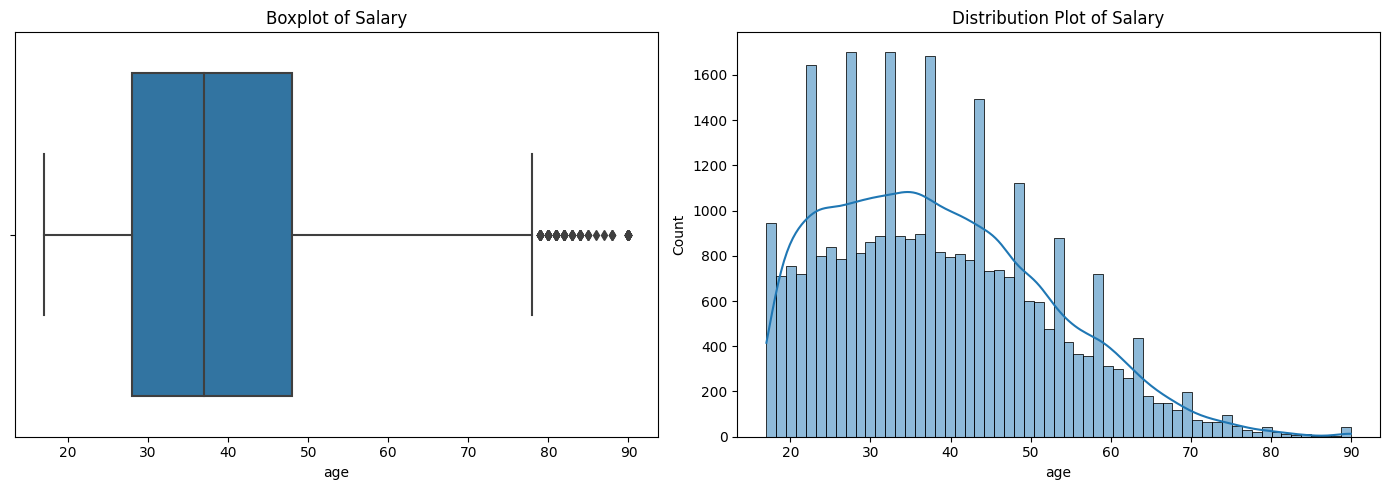

69.0

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(x=df['age'], ax=axes[0])
axes[0].set_title('Boxplot of Salary')

# Distribution plot
sns.histplot(df['age'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot of Salary')

# Display the plots
plt.tight_layout()
plt.show()


In [36]:
df.describe?

Signature: df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the r

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


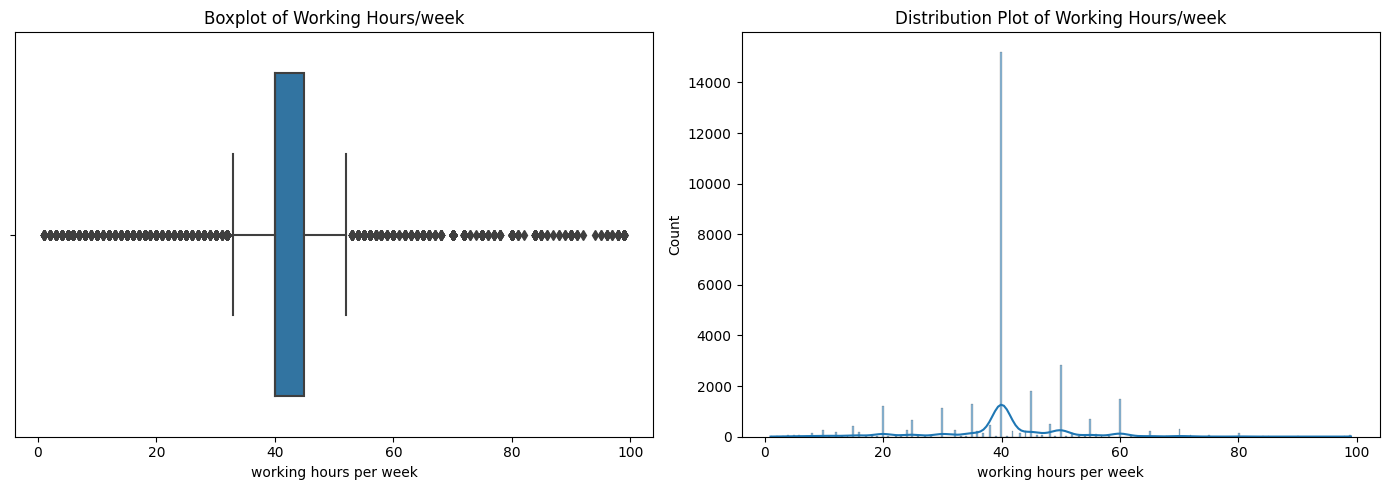

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(x=df['working hours per week'], ax=axes[0])
axes[0].set_title('Boxplot of Working Hours/week')

# Distribution plot
sns.histplot(df['working hours per week'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot of Working Hours/week')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
df['age']